In [185]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pyecharts import options as opts
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

## 1、使用上述数据表绘制mpg、cyl、disp、hp、drat、wt、qsec、vs、am、gear、carb、fast各变量的关系矩阵图。

In [327]:
df = pd.read_csv('./数据/mtcars.csv')

In [328]:
df = df.drop(['cars','carname'],axis=1)

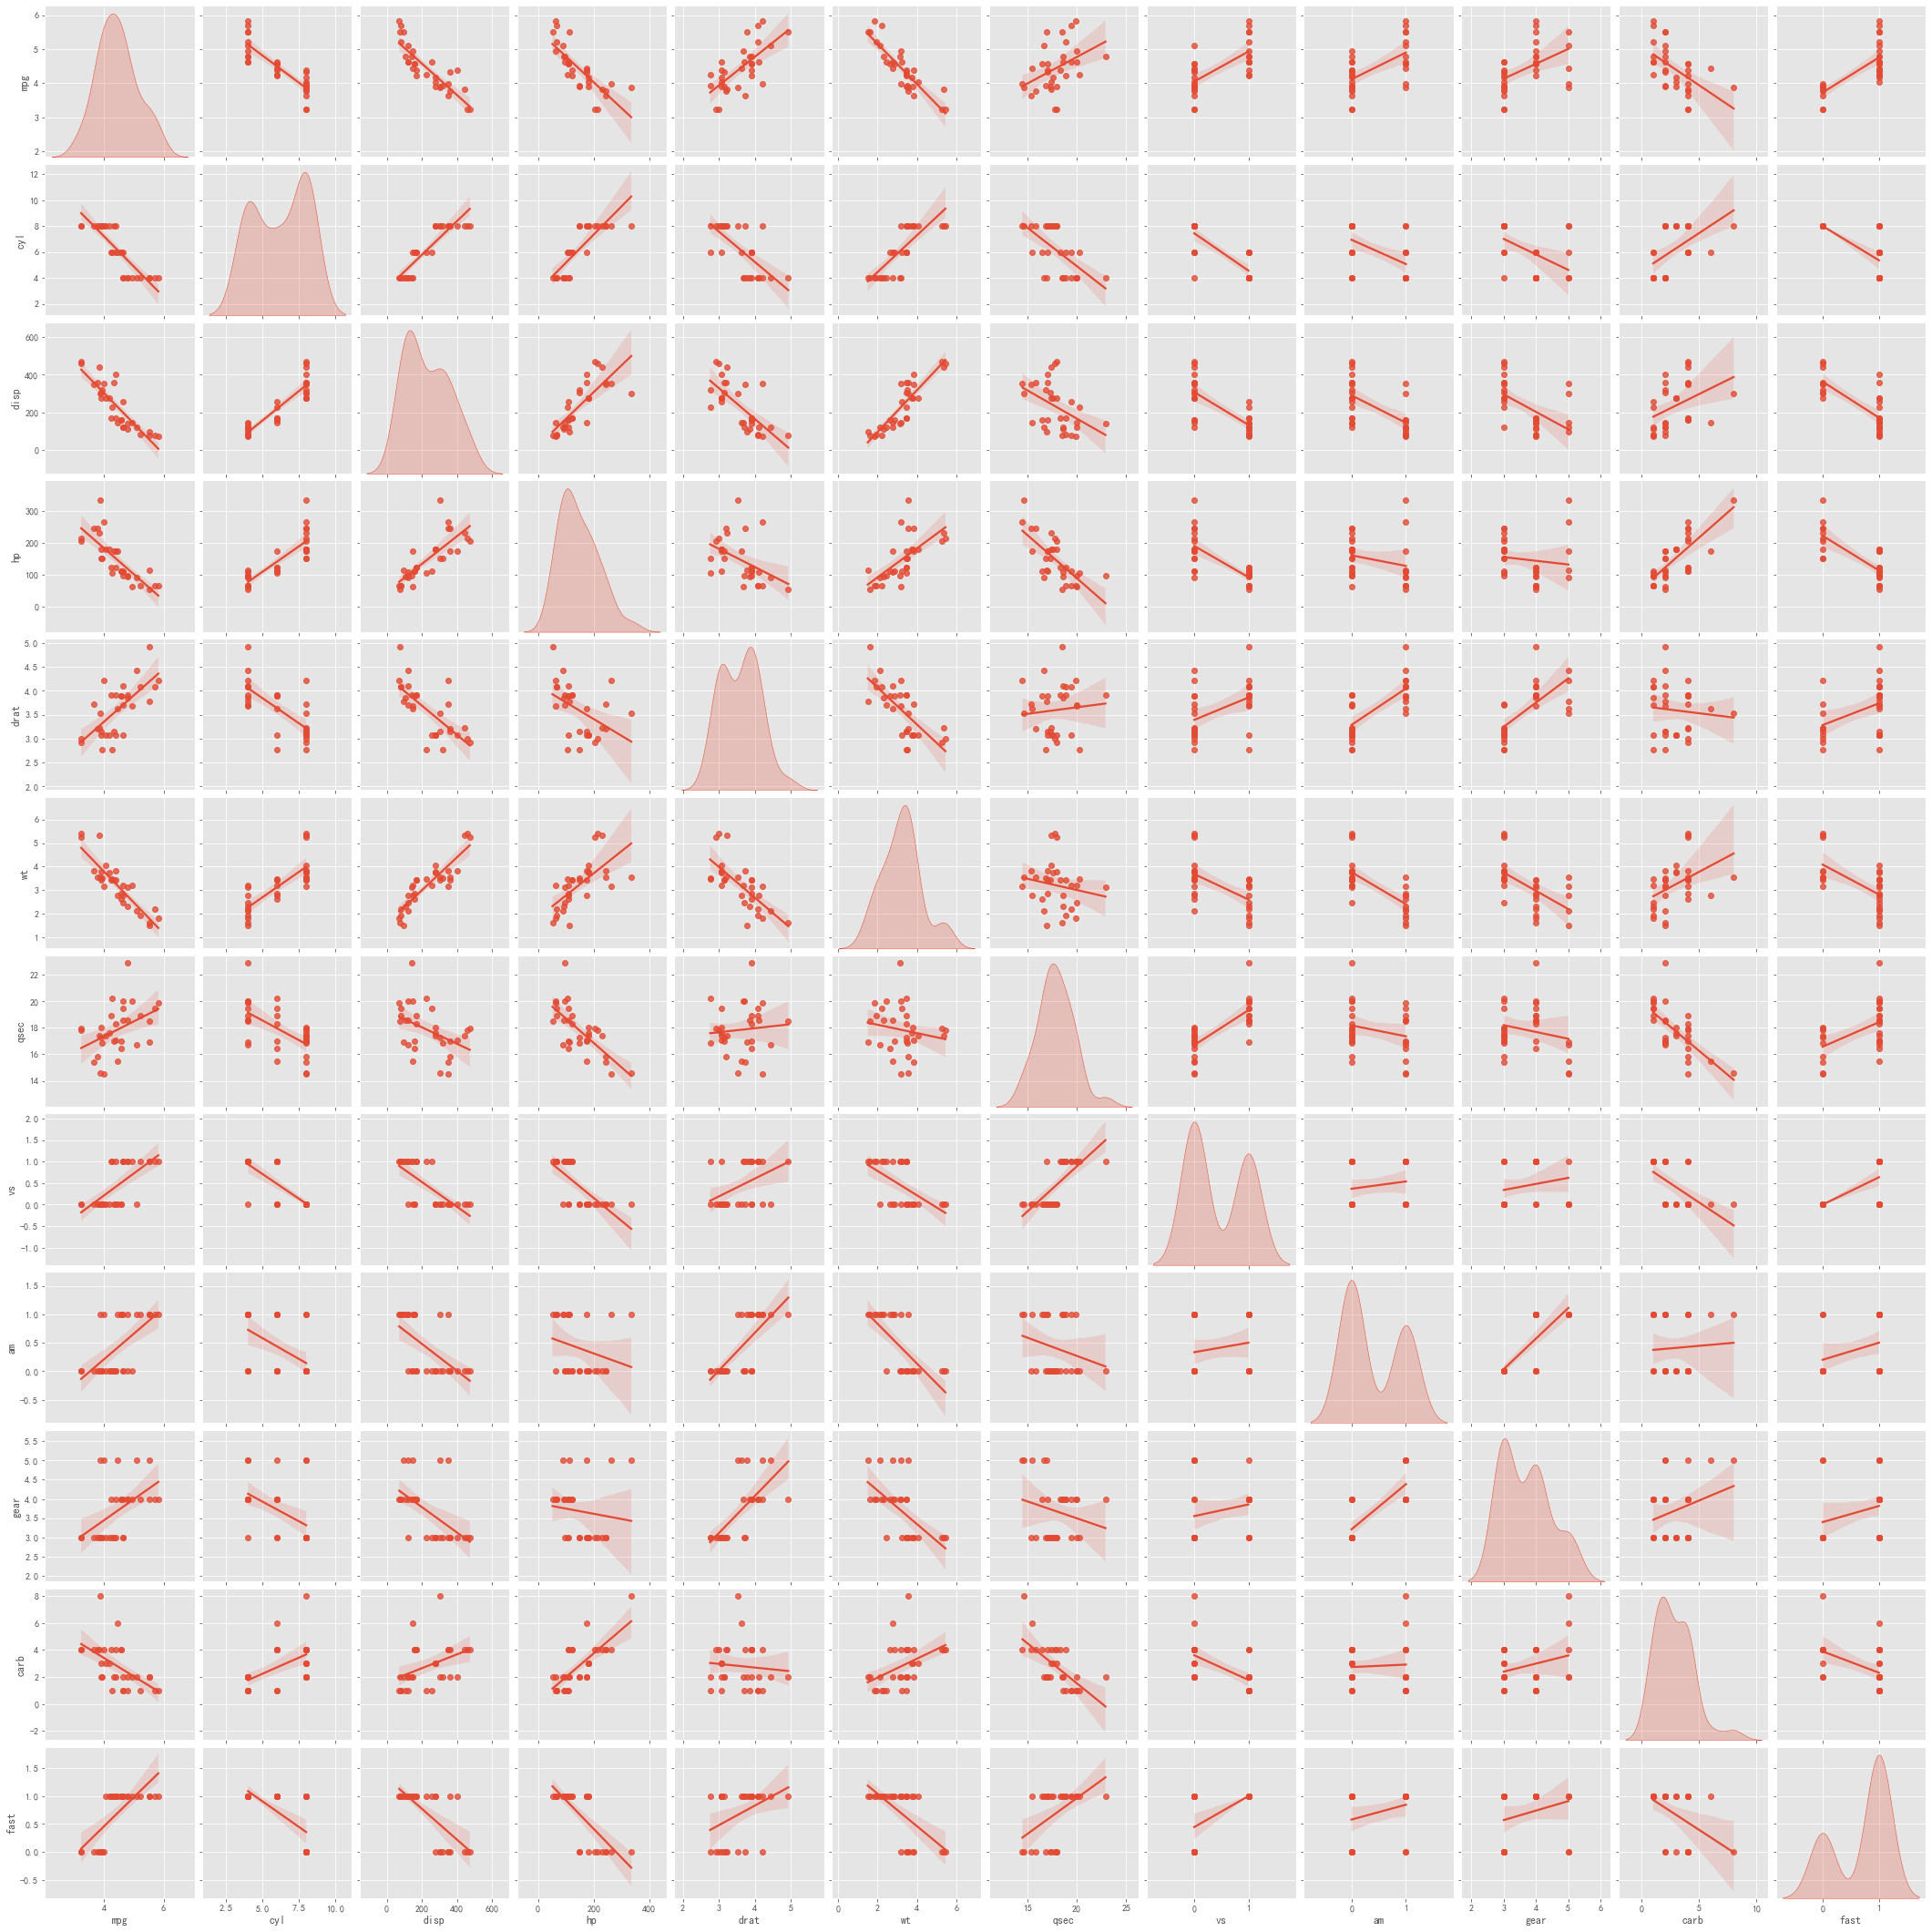

In [339]:
g = sns.pairplot(df,diag_kind="kde",kind="reg")

## 2、使用上述数据表绘制mpg、cyl、disp、hp、drat、wt、qsec、vs、am、gear、carb、fast各变量的相关系数矩阵图

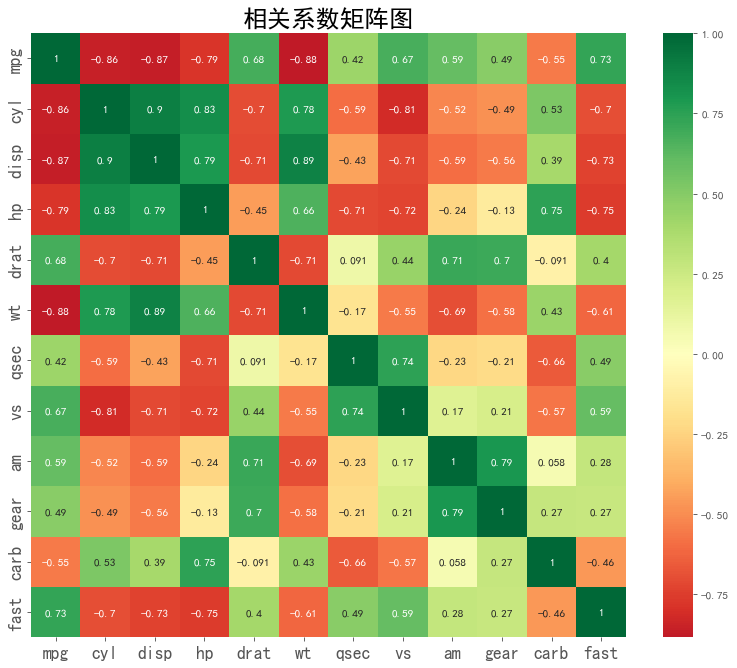

In [189]:
plt.figure(figsize=(12,10), dpi= 80)
ax = sns.heatmap(df.corr(),cmap='RdYlGn', center=0, annot=True)

plt.title('相关系数矩阵图', fontsize=22)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

## 3、绘制disp、hp和mpg体现三变量关系的气泡图，其中使用气泡面积代表每加仑英里数

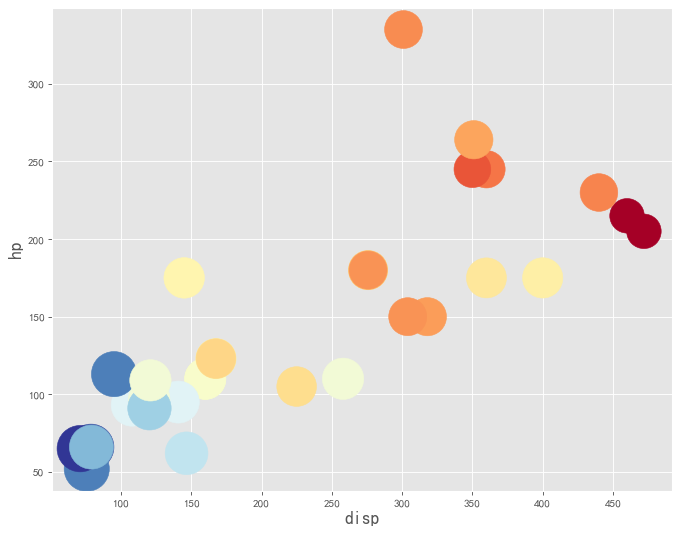

In [190]:
plt.figure(figsize=(10,8), dpi= 80)
cm = plt.cm.get_cmap('RdYlBu')

plt.scatter(df['disp'],df['hp'],s=df['mpg']*300,c=df['mpg'],cmap=cm)
plt.xlabel('disp',fontsize=16)
plt.ylabel('hp',fontsize=16)
plt.show()

## 4、绘制汽车总马力（hp）的茎叶图

In [191]:
df1 = df['hp'].sort_values()

In [192]:
title_arr = []
for i in df1:
    i = str(i)
    if (i[:-1] not in title_arr):
        title_arr.append(i[:-1])
        st = ""
        for j in df1:
            j = str(j)
            if (j[:-1] == i[:-1]):
                st += " "+j[-1:]
        print(i[:-1].rjust(2), "|" ,st)

 5 |  2
 6 |  2 5 6 6
 9 |  1 3 5 7
10 |  5 9
11 |  0 0 0 3
12 |  3 3
15 |  0 0
17 |  5 5 5
18 |  0 0 0
20 |  5
21 |  5
23 |  0
24 |  5 5
26 |  4
33 |  5


## 5、绘制1/4英里时间（qsec）的直方图和核密度图，并叠加在一张图表中展示

In [193]:
import sklearn.neighbors as ne

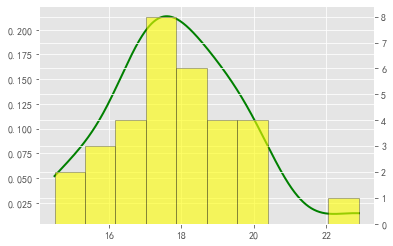

In [331]:
import matplotlib.mlab as mlab
kde = mlab.GaussianKDE(df['qsec'])
x2 = np.linspace(df['qsec'].min(), df['qsec'].max(), 1000)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()    #使用twinx添加y轴的坐标轴

#设置标签（共用X轴）
# ax1.set_xlabel('X') 
ax1.plot(x2,kde(x2), 'g-', linewidth = 2,color='green', label = "核密度图")
ax2.hist(df['qsec'], color = 'yellow', edgecolor = 'k', label = "直方图",alpha = 0.6)

plt.show()

## 6、绘制按照前进齿轮数（gear）分组的汽车排量（disp）、总马力（hp）和1/4英里时间（qsec)字段的峰峦图

<Figure size 1280x800 with 0 Axes>

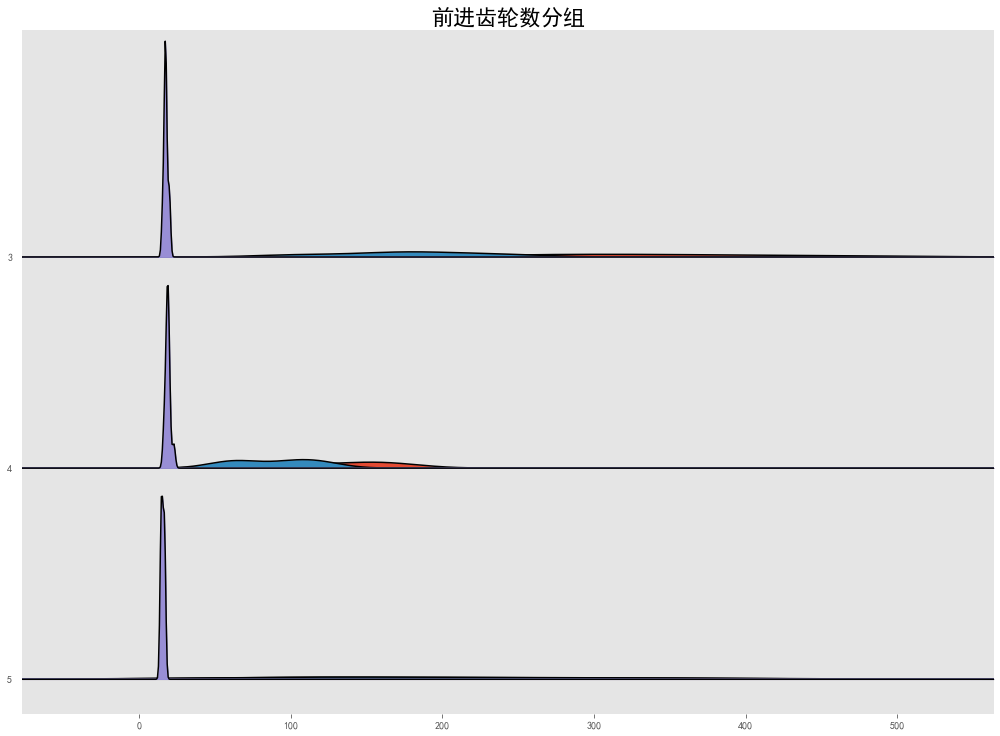

In [269]:
import joypy

plt.figure(figsize=(16,10), dpi= 80)
fig, axes = joypy.joyplot(df, column=['disp','hp','qsec'], by="gear",ylim='max' ,figsize=(14,10))
plt.title('前进齿轮数分组', fontsize=22)
plt.show()

## 7、绘制按照前进齿轮数（gear）分组的总马力（hp）字段的大提琴图

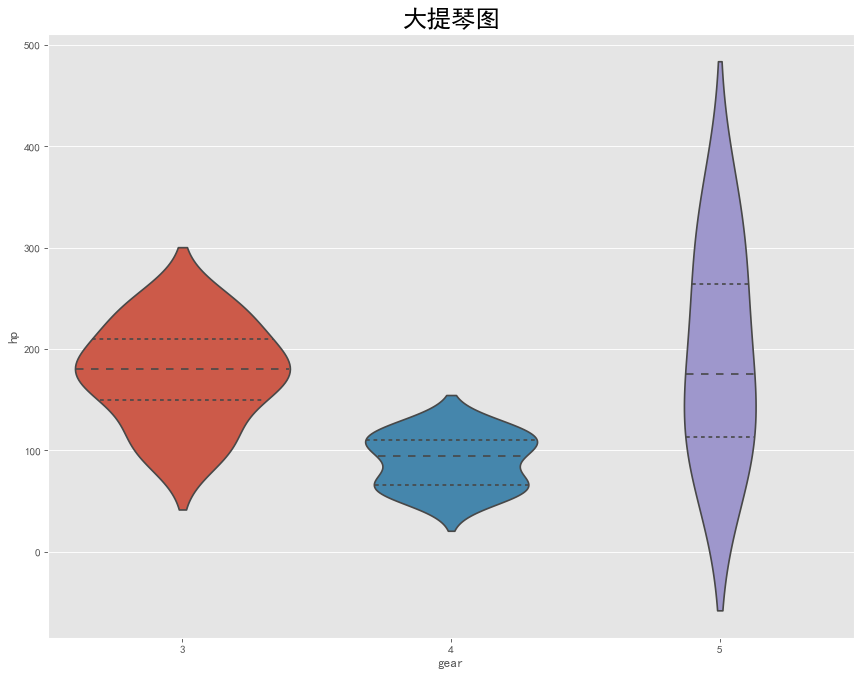

In [278]:
plt.figure(figsize=(13,10), dpi= 80)
sns.violinplot(x='gear', y='hp', data=df, scale='count', inner='quartile')
plt.title('大提琴图', fontsize=22)
plt.show()

## 8、根据汽车的总重量（wt）为权重绘制汽车名称（carname）的词云图

In [285]:
import pyecharts.options as opts
from pyecharts.charts import WordCloud
df = pd.read_csv('./数据/mtcars.csv')
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fast,cars,carname
0,4.582576,6,160.0,110,3.90,2.620,16.46,0,1,4,4,1,Mazda RX4,Mazda RX4
1,4.582576,6,160.0,110,3.90,2.875,17.02,0,1,4,4,1,Mazda RX4 Wag,Mazda RX4 Wag
2,4.774935,4,108.0,93,3.85,2.320,18.61,1,1,4,1,1,Datsun 710,Datsun 710
3,4.626013,6,258.0,110,3.08,3.215,19.44,1,0,3,1,1,Hornet 4 Drive,Hornet 4 Drive
4,4.324350,8,360.0,175,3.15,3.440,17.02,0,0,3,2,1,Hornet Sportabout,Hornet Sportabout


In [292]:
car_arr = []
for n in range(0,len(df['cars'])):
    car_arr.append(tuple([df.iloc[n,13],df.iloc[n,5]]))

In [302]:
(
    WordCloud()
    .add(series_name="汽车名称", data_pair=car_arr, word_size_range=[6, 66])
    .set_global_opts(
        title_opts=opts.TitleOpts(
            title="汽车名称", title_textstyle_opts=opts.TextStyleOpts(font_size=23)
        ),
        tooltip_opts=opts.TooltipOpts(is_show=True),
    )
    .render_notebook()
)

## 9、下载数据http://i9000.net:8888/sgn/LMS/Visual/8/weibo-2.json，绘制微博转发关系图。

In [305]:
fd = pd.read_json("数据/weibo-2.json")

In [315]:
import json
from pyecharts import options as opts
from pyecharts.charts import Graph

with open("数据/weibo-2.json", "r", encoding="utf-8") as f:
    j = json.load(f)
    nodes, links, categories, cont, mid, userl = j
c = (
    Graph()
    .add(
        "Graph-微博转发关系图",
        nodes,
        links,
        categories,
        repulsion=50,
        linestyle_opts=opts.LineStyleOpts(curve=0.2),
        label_opts=opts.LabelOpts(is_show=False),
    )
    .set_global_opts(
        legend_opts=opts.LegendOpts(is_show=False),
        title_opts=opts.TitleOpts(title="Graph-微博转发关系图"),
    )
)
c.render_notebook()